### Basic Data Science course - Hashtag Programação
### Análise Exploratória dos Dados

- Dataset titanic:
    - https://www.kaggle.com/competitions/titanic/data

As colunas desse dataset são:
- Passenger ID: ID do passageiro (número único para cada um dos passageiros)
- Survived: sobrevivente (0 = Não, 1 = Sim)
- Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
- Name: nome do passageiro
- Sex: Gênero do passageiro
- Age: Idade (em anos) do passageiro
- SibSp: número de irmãos / cônjuges a bordo do Titanic
- Parch: número de pais / filhos a bordo do Titanic
- Ticket: número do ticket
- Fare: tarifa da passagem
- Cabin: número da cabine
- Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base de dados
base = pd.read_csv('titanic_train.csv')

In [3]:
# Visualizando as 3 primeiras linhas
base.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
# Visualizando as 3 últimas linhas
base.tail(3)

PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
# Verificando o tamanho da base
base.shape

(891, 12)

### Visualizando um resumo das informações

In [6]:
# Verificando as informações 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Contando a quantidade de valores nulos
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Verificando as informações estatísticas
base.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**A cardinalidade nos ajuda a saber a quantidade de dados distintos em uma coluna**
- Se tivermos muitos valores distintos, provavelmente aquela coluna não será uma boa opção para usarmos no modelo
- Matematicamente, cardinalidade é o número de elementos de um conjunto
- Podemos verificar a cardinalidade usando o `.nunique()`

In [9]:
# Verificando o número de valores únicos
base.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Visualizando de forma gráfica
- Para visualizar essas informações de maneira gráfica, podemos utilizar o matplotlib
    - https://matplotlib.org/

In [10]:
# Importando o matplotlib
import matplotlib.pyplot as plt

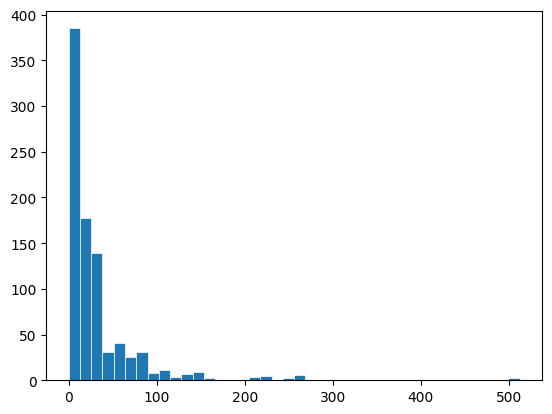

In [11]:
# Verificando o histograma das tarifas
x = base.Fare

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

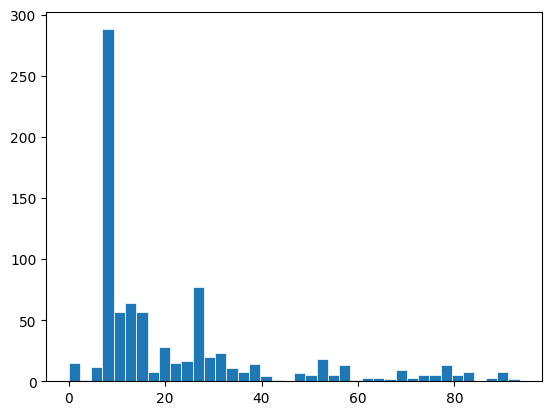

In [12]:
# Verificando o histograma das tarifas apenas para tarifas menores que 100 reais
x = base[base.Fare < 100].Fare

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

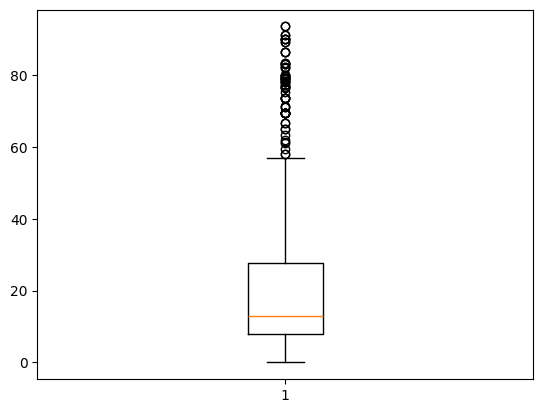

In [13]:
# Verificando o boxplot para a coluna Fare
x = base[base.Fare < 100].Fare

# plot:
fig, ax = plt.subplots()

ax.boxplot(x)

plt.show()

**Dependendo do visual, outras bibliotecas já podem ter opções mais prontas para usarmos, como o caso do pairplot no seaborn**
- Como cientistas, devemos escolher a ferramenta que melhor resolve o nosso problema
- O pairplot no seaborn:
    - https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
! pip install seaborn

In [15]:
# Importando o seaborn
import seaborn as sns

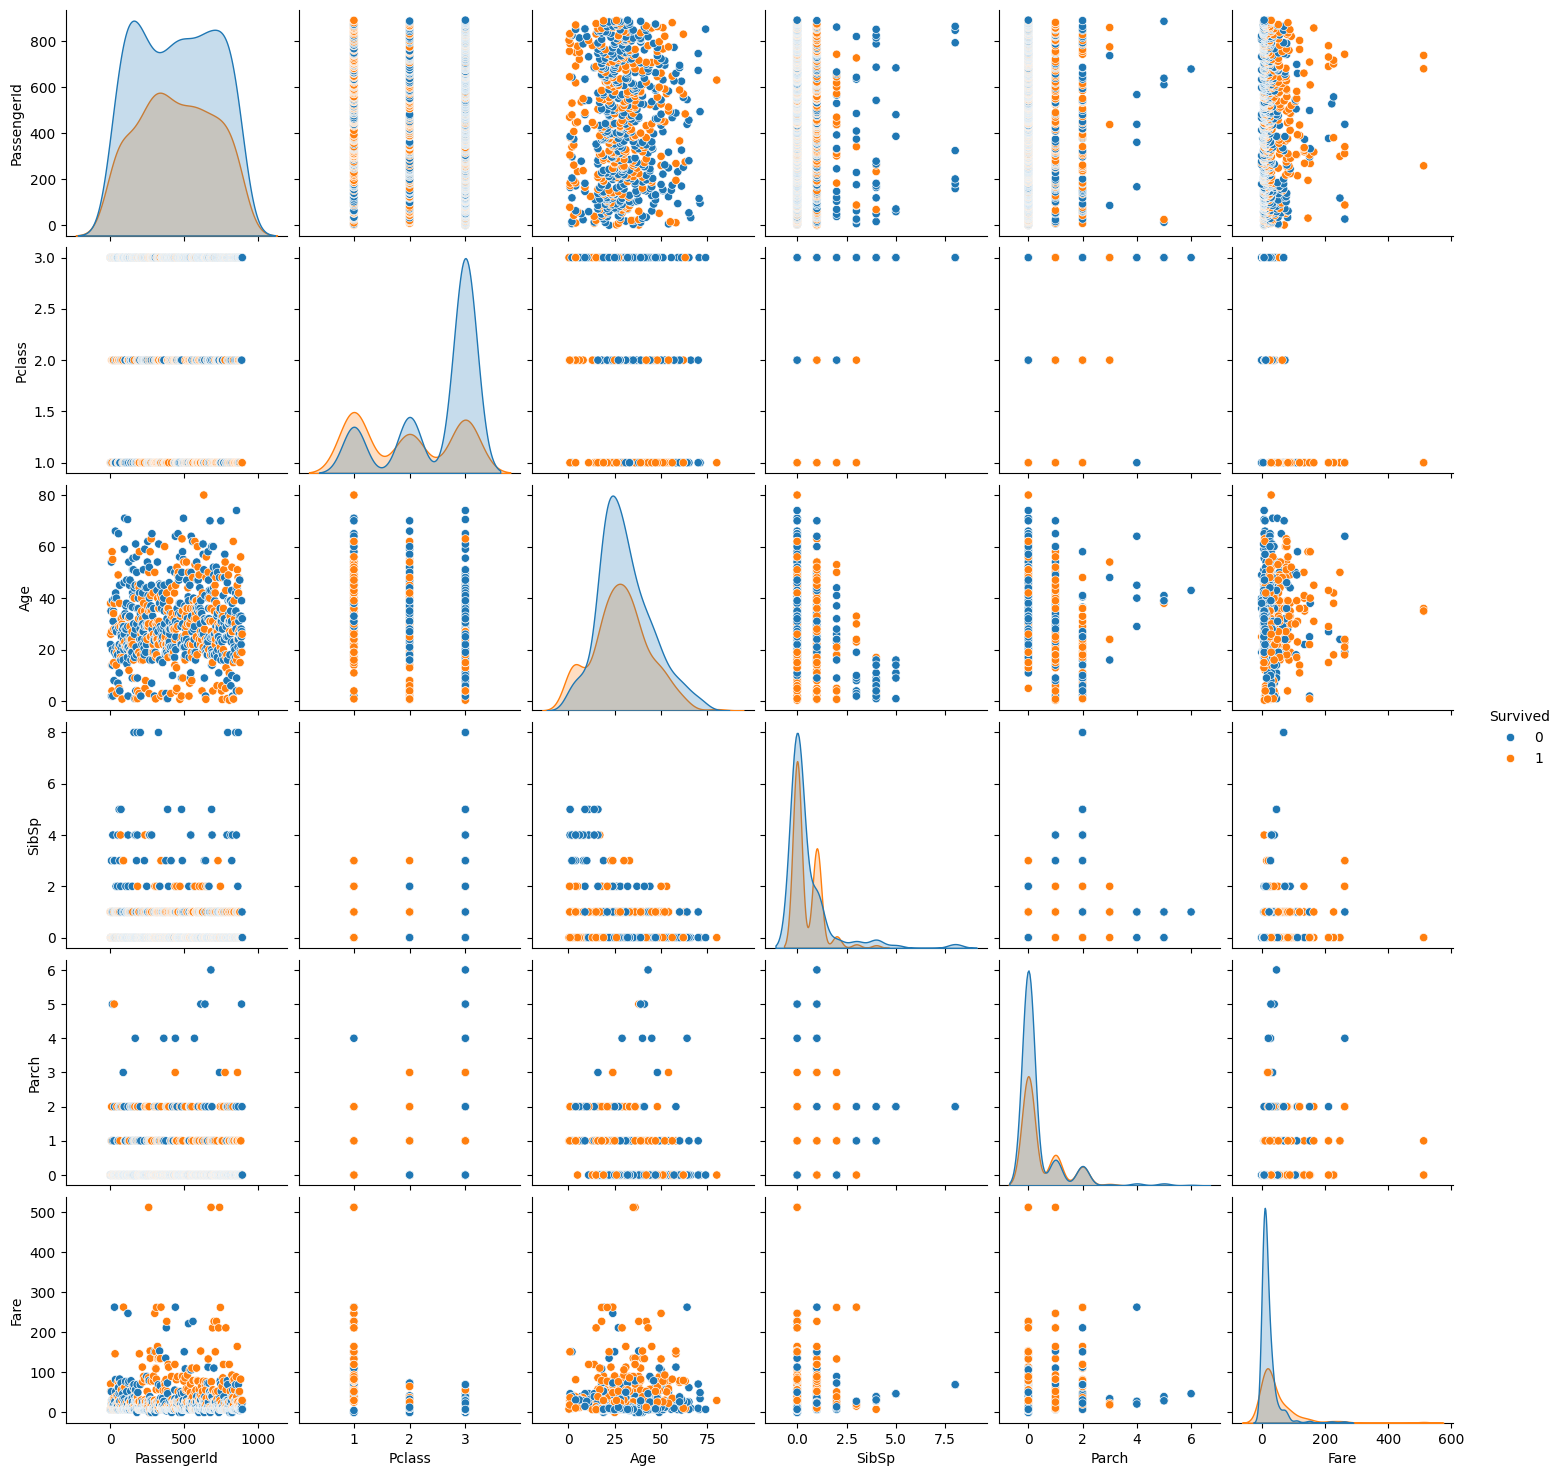

In [16]:
# Criando o pairplot
sns.pairplot(base,hue='Survived')

In [ ]:
# Install NumPy
! pip install numpy

In [18]:
# Import NumPy:
import numpy as np

In [19]:
# Selecionando apenas as colunas numéricas
num_base = base.select_dtypes(include=[np.number])

# Criando uma matriz de correlação entre as variáveis
base_corr = num_base.corr()

print(base_corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


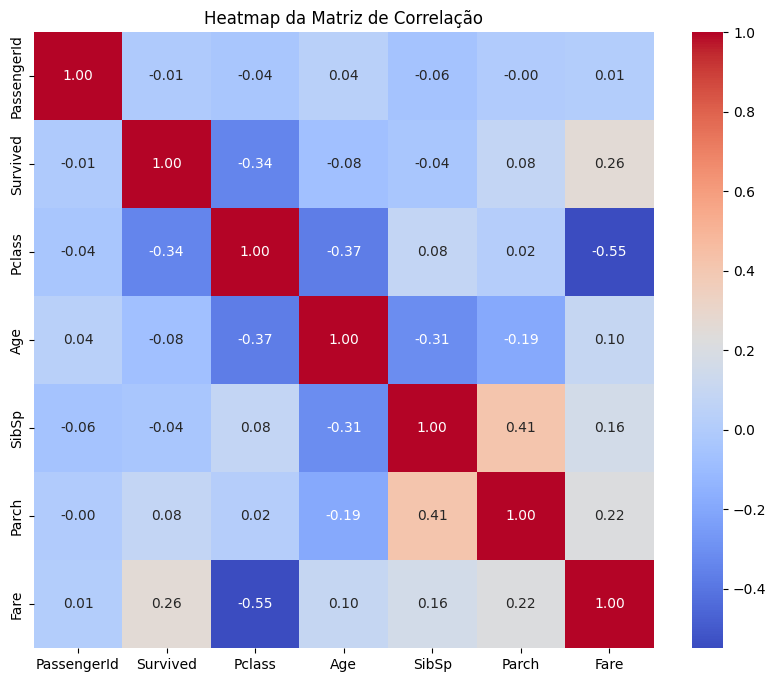

In [20]:
# Utilizando o heatmap do seaborn para tornar essa matriz mais visual
plt.figure(figsize=(10, 8))
sns.heatmap(base_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap da Matriz de Correlação')
plt.show()

**Pandas Profiling**
- https://pypi.org/project/pandas-profiling/

In [ ]:
! pip install pandas

In [ ]:
! pip install pandas-profiling

In [ ]:
! pip install --upgrade pandas-profiling

In [ ]:
! pip install pydantic==1.10.9

In [ ]:
! pip install git+https://github.com/pandas-profiling/pandas-profiling.git

In [ ]:
# Importando o pandas e o pandas profiling
import pandas as pd
from pandas_profiling import ProfileReport

In [27]:
import pandas as pd

In [29]:
# Importando a base de dados
base = pd.read_csv("titanic_train.csv")

In [ ]:
! pip install --upgrade setuptools

In [35]:
# Gerando o relatório
profile = ProfileReport(base, title="Pandas Profiling Report")

In [ ]:
! pip install ipywidgets

In [38]:
# Visualizar o relatório
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


In [39]:
# Exportando como um html
profile.to_file("relatorio.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 33.78it/s]
